In [ ]:
!pip install tensorflow-datasets

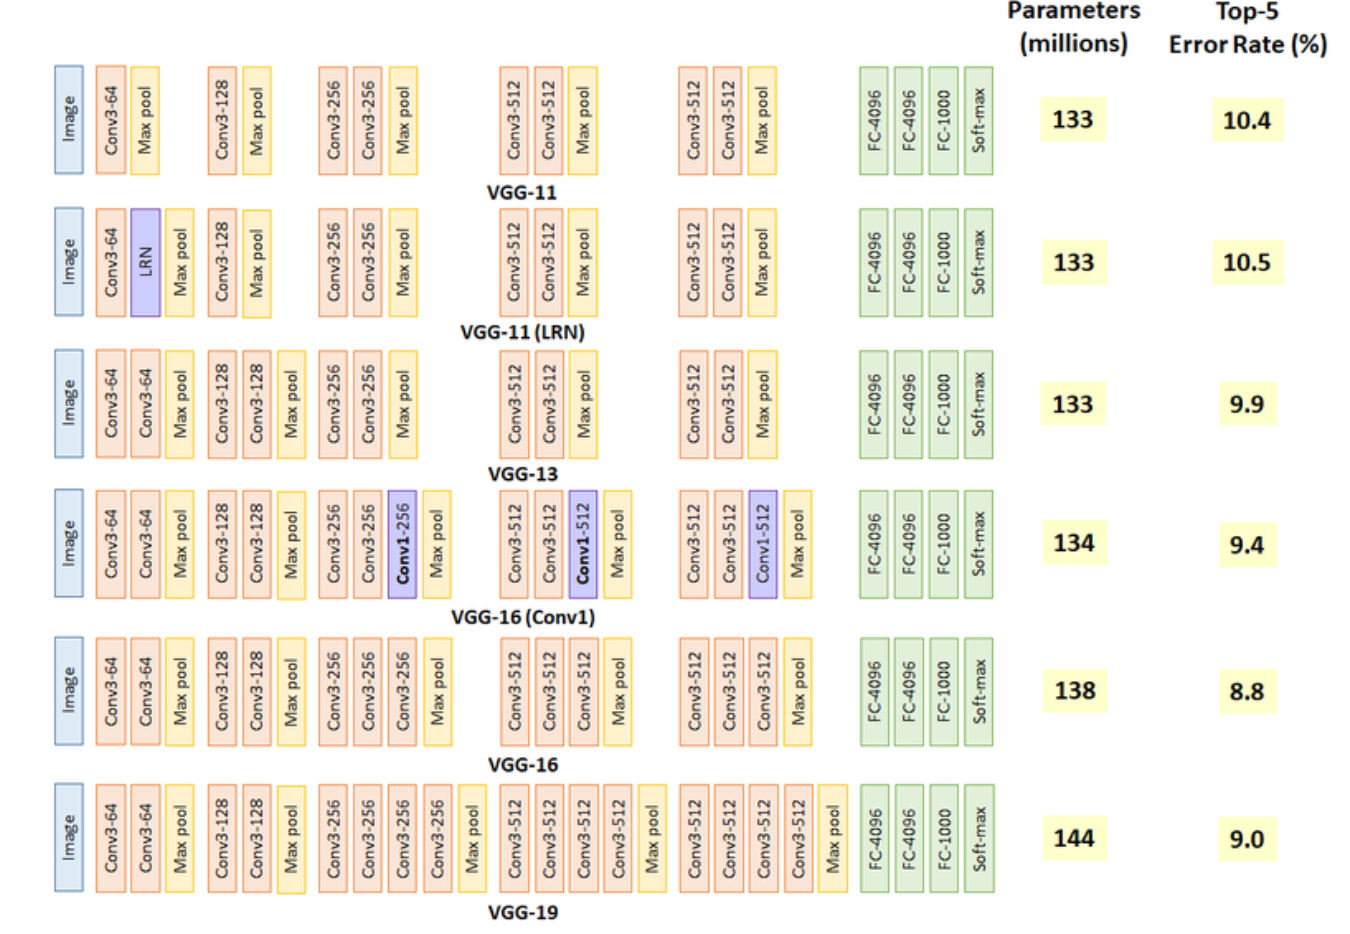

#üì£ Î™©Ï∞®
- step1 import
- step2 Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑÌïòÍ∏∞
- step3 make VGG model
    - VGG 16
    - VGG 19
- step4 VGG16 Í≥º VGG19 ÏÑ±Îä• ÎπÑÍµê

# step1 import

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

In [ ]:
# Tensorflow Í∞Ä ÌôúÏö©Ìï† GPU Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÏûê
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#step2 Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑÌïòÍ∏∞

In [ ]:
# data load
import urllib3
urllib3.disable_warnings()

#tfds.disable_progress_bar()   # Ïù¥ Ï£ºÏÑùÏùÑ ÌíÄÎ©¥ Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìúÍ≥ºÏ†ïÏùò ÌîÑÎ°úÍ∑∏Î†àÏä§Î∞îÍ∞Ä ÎÇòÌÉÄÎÇòÏßÄ ÏïäÏäµÎãàÎã§.

(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True, # ÏÖîÌîåÏùÑ Ìï†ÏßÄÎßêÏßÄ, 
    with_info=True, # 
)
# ds_validation, split = ['trian','validation',test] Ïù¥Î†áÍ≤å ÏÑ§Ï†ïÌïòÎ©¥ ÏïåÏïÑÏÑú Î∂ÑÎ¶¨Ìï¥ÏÑú Í∞ÄÏ†∏ÏôÄÏ§ÄÎã§. ÏßÄÍ∏à ÎÖ∏ÎìúÏóêÏÑúÎäî 2Í∞ÄÏßÄÎßå Îç∞Î¶¨Í≥† ÏôîÎã§

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incomplete2IV7WY/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incomplete2IV7WY/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
# Tensorlow Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î°úÎìúÌïòÎ©¥ feature Ï†ïÎ≥¥Î•º ÌôïÏù∏Ìï¥Î≥¥Ïûê
print(ds_info.features)

# ÌÅ¨Í∏∞ 32 X 32 X 3
# dictionary Ïù¥Íµ¨ÎÇò
# key Í∞íÏùÑ ÌÜµÌï¥ÏÑú value Î•º Í∞ÄÏ†∏Ïò®Îã§

FeaturesDict({
    'id': Text(shape=(), dtype=tf.string),
    'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})


In [ ]:
# Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÎ•º ÌôïÏù∏Ìï¥ Î≥¥Ïûê
print(tf.data.experimental.cardinality(ds_train))
print(tf.data.experimental.cardinality(ds_test))

tf.Tensor(50000, shape=(), dtype=int64)
tf.Tensor(10000, shape=(), dtype=int64)


In [ ]:
def normalize_and_resize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    # image = tf.image.resize(image, [32, 32])
    return tf.cast(image, tf.float32) / 255., label  
    # 2Í∞úÍ∞Ä Îì§Ïñ¥ÏôÄÏÑú 2Í∞úÍ∞Ä ÎÇòÍ∞ÄÎäî Íµ¨ÎÇò
    # cast Ïù¥ÎØ∏ÏßÄÎ•º Î≥ÄÌôòÏùÑ ÏãúÌÇ§Íµ¨, labelÏùÄ Í∑∏ÎåÄÎ°ú ÎÇòÍ∞ÑÎîî.

In [ ]:
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=1 # map ÏùÑ ÏãúÌÇ¨Îïå Î≥ëÎ†¨Ï†ÅÏúºÎ°ú ÏãúÌÇ§ÎäîÍ≤É, Í∞ÄÏßÄÍ≥† ÏûàÎäî cpu  Í∞úÏàòÎßåÌÅº ÏãúÌÇ§ÎäîÍ≤å Ï†úÏùº Ï¢ãÎã§
    )
    # Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìïú Î∂ÄÎ∂Ñ ds.map(Ìï®Ïàò, „Öá„Öá)d
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat() # map Ìï®ÏàòÎ°ú ÏÜåÎπÑÍ∞Ä Îã§ ÎêòÎèÑ, Í≥ÑÏÜç ÏÇ¨Ïö©ÌïòÍ≤å ÌïòÎäî Í≤ÉÏù¥Îã§.
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE) # Ïù¥Í≤ÉÏùÑ ÌïòÎ©¥ ÌïôÏäµÏùÑ Ï°∞Í∏à Îπ†Î•¥Í≤å Ìï¥Ï§ÄÎã§. 
    return ds

In [ ]:
ds_info.features["label"].num_classes

10

In [ ]:
ds_info.features["label"].names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

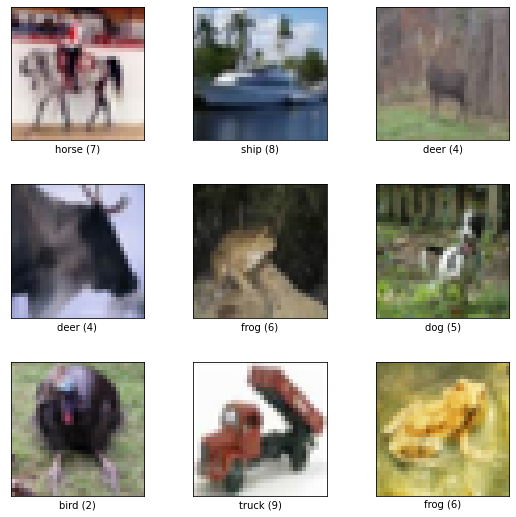

In [ ]:
fig = tfds.show_examples(ds_train, ds_info)
# matplolib ÏùÑ Ìï¥ÏïºÌïòÎäîÎç∞ tsdf Ïùò Ïû•Ï†êÏù¥Îã§. Î≥µÏû°ÌïòÏßÄ ÏïäÍ≤å Î≥º Ïàò ÏûàÎã§/

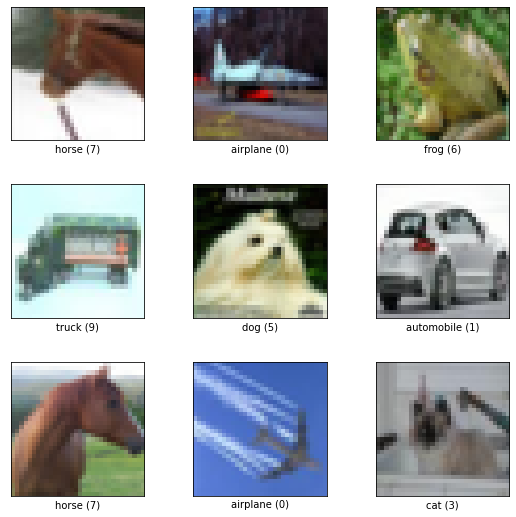

In [ ]:
fig = tfds.show_examples(ds_test, ds_info)

#step3  make VGG model
- Îî•Îü¨Îãù Î™®Îç∏ÏóêÏÑú Ï£ºÏöî Íµ¨Ï°∞Î•º Î™®ÎìàÌôî ÏãúÏºúÏÑú Ï°∞Í∏àÏî© Î∞îÍæ∏Ïñ¥ Ïì∏ Ïàò ÏûàÎäî Îã®ÏúÑÎ•º Î∏îÎ°ù(block) Ïù¥ÎùºÍ≥† ÌïúÎã§
- layer Îäî Í∏∞Î≥∏Ï†ÅÏúºÎ°ú tesnorflow, keras, pytorch Îì±ÏóêÏÑú Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Ï†úÍ≥µÌïòÎäî Îã®ÏúÑÏù¥Îã§.
- Ïó¨Í∏∞ÏÑú Ïö∞Î¶¨Îäî **Ìïú Îã®Í≥Ñ ÏúÑÏù∏ Î∏îÎ°ù**ÏùÑ Îã®ÏúÑÎ™®Îç∏Î°ú ÎßåÎì†Îã§
### VGG
- VGG Î∏îÎ°ùÏùÄ Í∞úÎûµÏ†ÅÏúºÎ°ú CNNÎ†àÏù¥Ïñ¥ Ïó¨Îü¨Í∞úÏôÄ Max pooling Î†àÏù¥Ïñ¥ Ìïú Í∞úÎ°ú Ïù¥Î£®Ïñ¥ ÏßÑÎã§. CNN Î™®Îëê Ïª§ÎÑê ÌÅ¨Í∏∞Í∞Ä 3 X 3 ÎùºÎäî ÎåÄÌëúÏ†ÅÏù∏ ÌäπÏÑ±ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎã§


In [ ]:
# function for building VGG Block
# Í≥ÑÏÜç ÏåìÎäî Î†àÏù¥Ïñ¥Í∞Ä Î∞òÎ≥µÎêòÍ∏∞ ÎñÑÎ¨∏Ïóê, block Ïù¥ÎùºÎäîÍ≤ÉÏùÑ ÎßåÎì§Ïñ¥ÏÑú ÏåìÎäîÎã§.

def build_vgg_block(input_layer,
                    num_cnn=3, 
                    channel=64,
                    block_num=1,
                   ):
    # - Í∞íÏù¥ ÏïàÎì§Ïñ¥ ÏôîÏùÑÎïå Í∏∞Î≥∏Ï†ÅÏúºÎ°ú 3ÏúºÎ°ú Ìï¥ÏïºÌïúÎã§Îäî ÎúªÏù¥Îã§. 


    # ÏûÖÎ†• Î†àÏù¥Ïñ¥
    x = input_layer

    # CNN Î†àÏù¥Ïñ¥
    # functional Î∞©Î≤ïÏúºÎ°ú layer ÏùÑ ÏåìÎäî Í≥ºÏ†ïÏù¥Îã§. (ÎÇ¥Í∞Ä Ïù¥ÎïåÍπåÏßÄ ÏïåÏïòÎäîÎçòÍ≤É sequentail Î∞©Î≤ï)
    for cnn_num in range(num_cnn):
        x = keras.layers.Conv2D(
            filters=channel,
            kernel_size=(3,3), # - ÌïÑÌÑ∞ ÏÇ¨Ïù¥Ï¶à 
            activation='relu',
            kernel_initializer='he_normal',
            padding='same', # - xÏùò ÏÇ¨Ïù¥Ï¶àÍ∞Ä Ïú†ÏßÄÍ∞Ä ÎêúÎã§(same Ïù¥ÎùºÍ≥† ÎëêÎ©¥),
            name=f'block{block_num}_conv{cnn_num}'
        )(x)    # - ÏúÑÏóê ÏûÖÎ†• Î†àÏù¥Ïñ¥Í∞Ä Îì§Ïñ¥Í∞ÑÎã§, 

    # Max Pooling Î†àÏù¥Ïñ¥
    x = keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=2, # - ÏÇ¨Ïù¥Ï¶àÎ•º Ï†àÎ∞òÏúºÎ°ú Ï§ÑÏó¨Î≤ÑÎ¶∞Îã§Îäî Í≤ÉÏù¥Îã§. 
        name=f'block{block_num}_pooling'
    )(x)

    return x

In [ ]:
vgg_input_layer = keras.layers.Input(shape=(32,32,3))   # ÏûÖÎ†• Î†àÏù¥Ïñ¥ ÏÉùÏÑ±
vgg_block_output = build_vgg_block(vgg_input_layer)    # VGG Î∏îÎ°ù ÏÉùÏÑ±

In [ ]:
# Î∏îÎ°ù 1Í∞úÏßúÎ¶¨ model ÏÉùÏÑ±
model = keras.Model(inputs=vgg_input_layer, outputs=vgg_block_output)  

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv0 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pooling (MaxPooling2  (None, 16, 16, 64)       0         
 D)                                                              
                                                                 
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
_________________________________________________________

## step3.1VGG 16

In [ ]:
# VGG Î™®Îç∏ ÏûêÏ≤¥Î•º ÏÉùÏÑ±ÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§.
def build_vgg(input_shape=(32,32,3),
              num_cnn_list=[2,2,3,3,3],
              channel_list=[64,128,256,512,512],
              num_classes=10):
    # buiding vgg block ÏùÑ 5Í∞úÎ°ú Íµ¨ÏÑ±Îêú Í≤ÉÏùÑ ÎßåÎì§Í≤†Îã§ÎäîÍ≤ÉÏùÑ ÏßëÏûëÌï† Ïàò ÏûàÎã§
    
    assert len(cnn_list) == len(channel_list) #Î™®Îç∏ÏùÑ ÎßåÎì§Í∏∞ Ï†ÑÏóê config listÎì§Ïù¥ Í∞ôÏùÄ Í∏∏Ïù¥Ïù∏ÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
    # assert Îäî errorÎ•º Î∞úum_cnnÏÉùÌïòÌïòÎäî Ìï®ÏàòÏù¥Îã§(python function)

    input_layer = keras.layers.Input(shape=input_shape)  # input layerÎ•º ÎßåÎì§Ïñ¥Îë°ÎãàÎã§.
    output = input_layer
    
    # config listÎì§Ïùò Í∏∏Ïù¥ÎßåÌÅº Î∞òÎ≥µÌï¥ÏÑú Î∏îÎ°ùÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)): # zip ÎëêÍ∞úÏùò list Î•º Î¨∂Ïñ¥ÏÑú ÏåçÏúºÎ°ú ÎÇ¥Î≥¥ÎÇ¥ Ï£ºÎäîÍ≤É. ÏåçÏúºÎ°ú Î¨∂Í∏∞ ÏúÑÌï¥ÏÑú Ïì¥Îã§ [ 2,64][2,128]
        output = build_vgg_block(
            output,
            num_cnn=num_cnn, 
            channel=channel,
            block_num=i
        )
     # classfication ÏùÑ ÏúÑÌïú Î™®ÎìàÏùÑ ÎßåÎìúÎäî Í≤ÉÏù¥Îã§, flatten, Dense, Dense, Dense Ïù¥ Í≥ºÏ†ïÏùÑ Í±∞ÏπúÎã§   
    output = keras.layers.Flatten(name='flatten')(output)
    output = keras.layers.Dense(4096, activation='relu', name='fc1')(output) # 4096 Ïù¥ ÎåÄÏã† ÏïÑÎ¨¥ Ïà´ÏûêÎÇò ÎÑ£Ïñ¥ÎèÑ ÎêúÎã§. --> hidden layer ÏàòÎ•º 4096Í∞úÎ•º ÎÑ£ÎäîÎã§Îäî Í≤ÉÏù¥Îã§. 
    output = keras.layers.Dense(4096, activation='relu', name='fc2')(output)  
    output = keras.layers.Dense(num_classes, activation='softmax', name='predictions')(output)
    
    model = keras.Model(
        inputs=input_layer, 
        outputs=output
    )
    return model

In [ ]:
# Í∏∞Î≥∏Í∞íÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©Ìï¥ÏÑú VGG Î™®Îç∏ÏùÑ ÎßåÎì§Î©¥ VGG-16Ïù¥ Îê©ÎãàÎã§.
vgg_16 = build_vgg() # Ìï®ÏàòÏùò Ï∂úÎ†•Í∞íÏù¥ model Ïù¥Îã§

vgg_16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block0_conv0 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block0_conv1 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block0_pooling (MaxPooling2  (None, 16, 16, 64)       0         
 D)                                                              
                                                                 
 block1_conv0 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block1_conv1 (Conv2D)       (None, 16, 16, 128)       147584    
                                                           

## step3.2 VGG 19

In [ ]:
# ÏõêÌïòÎäî Î∏îÎ°ùÏùò ÏÑ§Í≥ÑÏóê Îî∞Îùº Îß§Í∞úÎ≥ÄÏàòÎ°ú Î¶¨Ïä§Ìä∏Î•º Ï†ÑÎã¨Ìï¥ Ï§çÎãàÎã§.
vgg_19 = build_vgg(
    num_cnn_list=[2,2,4,4,4],
    channel_list=[64,128,256,512,512]
)

vgg_19.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block0_conv0 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block0_conv1 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block0_pooling (MaxPooling2  (None, 16, 16, 64)       0         
 D)                                                              
                                                                 
 block1_conv0 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block1_conv1 (Conv2D)       (None, 16, 16, 128)       147584    
                                                           

#step4 VGG16 Í≥º VGG19 ÏÑ±Îä• ÎπÑÍµê

In [ ]:
BATCH_SIZE = 256 # ÌïúÎ≤àÏóê Îç∞Ïù¥ÌÑ∞Î•º Î™áÍ∞úÏî© ÌïôÏäµÌï†Í≤ÉÏù∏Í∞Ä
EPOCH = 15 # 5ÎßåÍ∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º Î™áÎ≤à Î≥ºÍ≤ÉÏù∏Í∞Ä


In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)
ds_train = apply_normalize_on_dataset(ds_train, batch_size=BATCH_SIZE)
ds_test = apply_normalize_on_dataset(ds_test, batch_size=BATCH_SIZE)

In [ ]:
vgg_16.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_16 = vgg_16.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


195/195 [==============================] - 31s 84ms/step - loss: 2.1993 - accuracy: 0.1833 - val_loss: 2.1112 - val_accuracy: 0.2140
Epoch 2/15
195/195 [==============================] - 16s 82ms/step - loss: 2.0333 - accuracy: 0.2643 - val_loss: 1.9304 - val_accuracy: 0.3154
Epoch 3/15
195/195 [==============================] - 16s 80ms/step - loss: 1.8949 - accuracy: 0.3208 - val_loss: 1.8140 - val_accuracy: 0.3553
Epoch 4/15
195/195 [==============================] - 16s 80ms/step - loss: 1.7841 - accuracy: 0.3584 - val_loss: 1.7386 - val_accuracy: 0.3800
Epoch 5/15
195/195 [==============================] - 15s 80ms/step - loss: 1.7028 - accuracy: 0.3908 - val_loss: 1.6900 - val_accuracy: 0.3904
Epoch 6/15
195/195 [==============================] - 15s 79ms/step - loss: 1.6343 - accuracy: 0.4178 - val_loss: 1.5554 - val_accuracy: 0.4426
Epoch 7/15
195/195 [==============================] - 16s 80ms/step - loss: 1.5728 - accuracy: 0.4369 - val_loss: 1.5635 - val_accuracy: 0.4563
Epo

In [ ]:
vgg_16.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.001), clipnorm=1.),metrics=['accuracy'],)# Î¨¥Ïñ∏Í∞Ä Í∏∞Î≥∏Í∞íÏùÑ Î∞îÍæ∏Í≥† Ïã∂ÏùÄÎïåÎäî Í∞ÄÏßÄÍ≥† ÏôÄÏÑú ÏÑ§Ï†ïÌï¥Ï§ÄÎã§. # weight Î•º ÏóÖÎç∞Ïù¥Ìä∏ ÌïòÎäî Î∞©Î≤ï Í∑∏Í≤å optimizer Ïù¥Îã§. (ÌïôÏäµÏùÑ Ïñ¥ÎñªÍ≤å ÏãúÌÇ¨ÏßÄ Í¥ÄÎ†®ÎêòÏñ¥ ÏûàÎã§)
    
    # metrics Ïù¥ÎùºÎäîÍ≤å ÌïôÏäµÏùÑ ÏãúÌÇ¨Îïå Í≤∞Í≥ºÍ∞íÏùÑ ÌôïÏù∏ÌïòÍ≥† Ïã∂ÏùÄÎç∞(Ï¢ãÍ≥† ÎÇòÏÅ®ÏùÑ) Í∑∏Í±∏ ÏßÄÍ∏à accuracy Î•º ÌïúÍ±∞Îã§. Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º ÎÑ£ÏóàÏùÑÎñº Î™áÍ∞úÎ•º ÎßûÏ∂îÎäîÍ∞Ä precision Îì±Îì± ÏûàÎã§.


history_16 = vgg_16.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE), # num_example = train size Ïùò Í∞úÏàòÏù¥Îã§. 256Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ•º ÌïúÎ≤àÏóê ÎÑ£ÎäîÎã§. 50000/256 = Î™áÎ≤à ÌïôÏäµÏùÑ ÏãúÌÇ¨ÏßÄ195Î≤à Ïù¥ ÎÇòÏò®Îã§
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,# Ïñ¥ÎñªÍ≤å Í≤∞Í≥ºÎ•º Î≥¥Ïó¨Ï§ÑÍ≤ÉÏù∏Í∞Ä(ÎπÑÏ•¨Ïñº Ï†ÅÏù∏ Î∂ÄÎ∂ÑÏù¥Îã§)
    use_multiprocessing=True,
)
# compile Ïù¥ÎùºÎäîÍ≤ÉÏùÄ Ïñ¥ÎñªÍ≤å ÌïôÏäµÏùÑ ÏãúÌÇ¨Í≤ÉÏù∏Í∞Ä Ï†ïÏùòÌïòÎäî Î∂ÄÎ∂ÑÏù¥Îã§.
# loss Î•º Ïñ¥ÎñªÍ≤å Ï†ïÏùòÌïòÎäêÎÉê? (Î™®Îç∏Ïù¥ ÏñºÎßàÎÇò ÎÇòÏÅúÏßÄ Ïñ¥ÎñªÍ≤å Ï†ïÏùò ÌïòÎäîÍ∞Ä)
# svm loss, cross entropy loss, hinge loss Îì±Îì± task Ïóê Îî∞ÎùºÏÑú Ïñ¥Îñ§ loss Î•º ÏÇ¨Ïö©Ìï¥ÏïºÌïòÎäîÏßÄ Îã§Î•¥Îã§. task Îùº ÌïòÎ©¥ classficatoin, regression, object dectection(Ïò§Î•∏Ï™Ω ÏúÑÎÅù, ÏôºÏ™Ω ÏïÑÎûò ÎÅù) Îì±Îì±

SyntaxError: ignored

In [ ]:
vgg_19.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_19 = vgg_19.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


195/195 [==============================] - 23s 93ms/step - loss: 2.2427 - accuracy: 0.1528 - val_loss: 2.1567 - val_accuracy: 0.2135
Epoch 2/15
195/195 [==============================] - 18s 92ms/step - loss: 2.0594 - accuracy: 0.2410 - val_loss: 1.9649 - val_accuracy: 0.2784
Epoch 3/15
195/195 [==============================] - 18s 92ms/step - loss: 1.9369 - accuracy: 0.2881 - val_loss: 1.8858 - val_accuracy: 0.3128
Epoch 4/15
195/195 [==============================] - 18s 92ms/step - loss: 1.8221 - accuracy: 0.3399 - val_loss: 1.7302 - val_accuracy: 0.3729
Epoch 5/15
195/195 [==============================] - 18s 92ms/step - loss: 1.7151 - accuracy: 0.3799 - val_loss: 1.6479 - val_accuracy: 0.4075
Epoch 6/15
195/195 [==============================] - 18s 92ms/step - loss: 1.6512 - accuracy: 0.4018 - val_loss: 1.5856 - val_accuracy: 0.4345
Epoch 7/15
195/195 [==============================] - 18s 92ms/step - loss: 1.5931 - accuracy: 0.4251 - val_loss: 1.5675 - val_accuracy: 0.4252
Epo

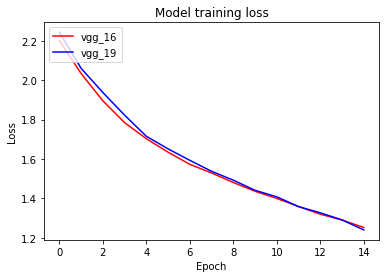

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_16.history['loss'], 'r')
plt.plot(history_19.history['loss'], 'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['vgg_16', 'vgg_19'], loc='upper left')
plt.show()

# history,history ÌïòÎ©¥ dict ÌòïÌÉúÎ°ú ÎÇòÏò§Í≥† ['loss'] ÎùºÎäî ÌÇ§Í∞íÏùÑ Î∂àÎü¨Ïò§Îäî Í≤ÉÏù¥Îã§. Í∑∏Î¶¨Í≥†  plt. plot ÏùÑ ÌïòÎ©¥ Í∑∏Î¶ºÏùÑ Í∑∏Î†§Ï§ÄÎã§

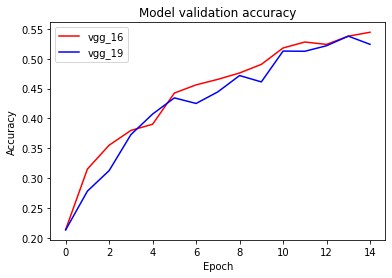

In [ ]:
plt.plot(history_16.history['val_accuracy'], 'r')
plt.plot(history_19.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['vgg_16', 'vgg_19'], loc='upper left')
plt.show()

In [ ]:
# Î™®Îç∏ ÌèâÍ∞Ä --> Î™®Îç∏ÏùÑ ÌèâÍ∞Ä ÌïúÎã§Îäî Í≤ÉÏùÄ test data Î°ú ÌïòÎäîÍ≤ÉÏù¥Îã§. 
# test data Î°ú evaluate ÌïúÍ≤ÉÏùÑ accuracy ÎùºÍ≥† ÌïúÎã§.


#model.evaluate(ds_test) # Ïù¥ Í≥ºÏ†ïÏù¥ ÌèâÍ∞Ä Ïù¥Îã§